<a href="https://colab.research.google.com/github/hdmcspadden/CS5010/blob/master/Sailors_BankDB_Activity_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CS 5012: SailorsDB and BankDB**

This notebook uses the files **SailosDB.db**,  **BankDB.db** from Module 9.4 SQLite Resources.
 
---



##Part 1: Create the Sailors and Bank Databases

<p>First we will get the two needed files from an online resource and unzip them, so they can be used. 


'wget' is not recognized as an internal or external command,
operable program or batch file.


'unzip' is not recognized as an internal or external command,
operable program or batch file.


Then, we will need to import the sqllite library. If there is an issue with import statement, make sure to have installed the sqllite library. You can easily do this by typing <code> pip install sqllite </code> or by creating a code cell on jupyter notebook or google colab by typing <code>!pip install sqllite. </code> Also, import the Pandas module so we can present the results in a nicely formatted table. Now import the two databases to be used later on.

In [23]:
import sqlite3
import pandas as pd

connS = sqlite3.connect('SailorsDB.db')
cursor = connS.cursor()
connB = sqlite3.connect('BankDB2.db')
cursorB = connB.cursor()

cursorB

##Part 2: Querying the <code>SailorsDB</code>



Test by creating a table with sid, sname, bid, and date of reservation from the SailorsDB.

In [8]:
cursor.execute('''SELECT Sailors.sid, sname, bid, day 
FROM Reserves, Sailors 
WHERE Reserves.sid=Sailors.sid 
ORDER BY Sailors.sid asc, bid asc''')
query = cursor.fetchall()
#query
pd.DataFrame(query,columns=['sid','sname','bid','date'])

OperationalError: no such table: Reserves

These following examples using the SailorsDB will be demoed in class with student participation.

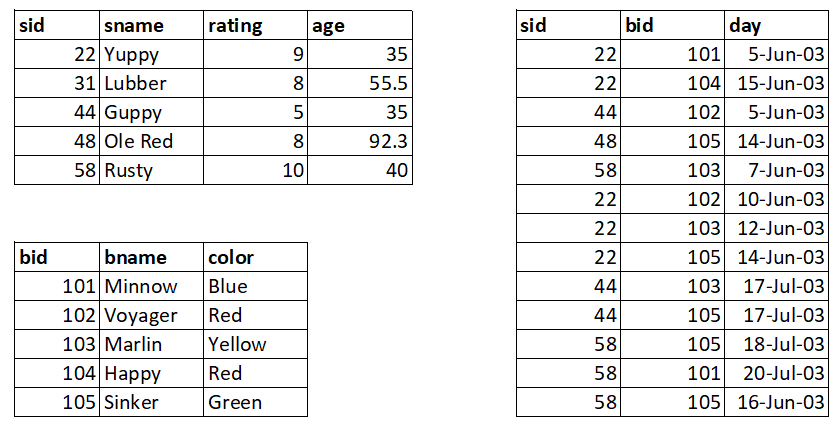


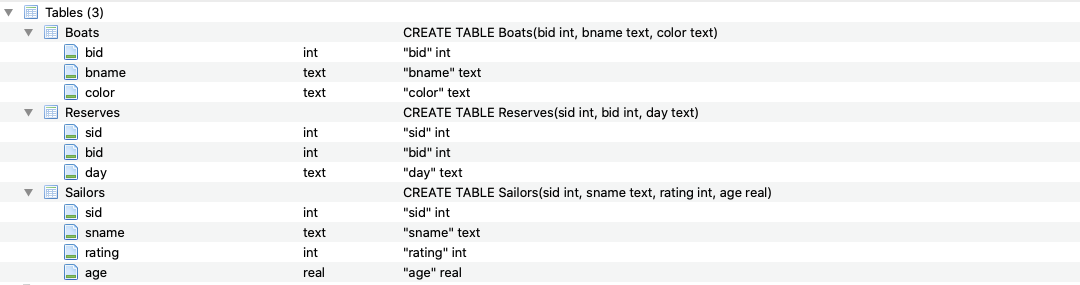

**Sailors Demo #1:** Find the names of sailors who have reserved boat 103.

In [ ]:
cursor.execute('''SELECT sname FROM Sailors, Reserves WHERE Sailors.sid=Reserves.sid and Reserves.bid=103
''')
query = cursor.fetchall()
pd.DataFrame(query,columns=['sailors'])

sailors
0   Rusty
1   Yuppy
2   Guppy

In [ ]:
cursor.execute('''SELECT sname FROM Sailors NATURAL JOIN Reserves 
WHERE Reserves.bid=103
''')
query = cursor.fetchall()
pd.DataFrame(query,columns=['sailors'])

sailors
0   Rusty
1   Yuppy
2   Guppy

**Sailors Demo #2:** Find the colors of the boats reserved by Yuppy.

In [ ]:
cursor.execute('''SELECT color 
FROM Sailors JOIN Reserves NATURAL JOIN Boats 
WHERE sname = "Yuppy"
 ''')
query = cursor.fetchall()
pd.DataFrame(query,columns=['boat color'])

boat color
0       Blue
1        Red
2     Yellow
3        Red
4      Green

**Sailors Demo #5:** Find the names of sailors who have reserved a red boat.

In [ ]:
cursor.execute('''SELECT DISTINCT sname 
FROM Sailors s, Reserves r, Boats b  
WHERE s.sid=r.sid AND r.bid=b.bid AND b.color="Red"
 ''')
query = cursor.fetchall()
pd.DataFrame(query,columns=['sailors'])

sailors
0   Yuppy
1   Guppy

**Sailors Demo #3:** Find the names of sailors who have reserved a red and a green boat. [INTERSECTION]

In [ ]:
cursor.execute('''SELECT DISTINCT sname
FROM Sailors s, Reserves r, Boats b  
WHERE s.sid=r.sid AND r.bid=b.bid AND b.color="Red"
INTERSECT
SELECT DISTINCT sname
FROM Sailors s, Reserves r, Boats b  
WHERE s.sid=r.sid AND r.bid=b.bid AND b.color="Green"
''')
query = cursor.fetchall()
pd.DataFrame(query,columns=['sailors'])

sailors
0   Guppy
1   Yuppy

**Sailors Demo #6:** Find the names of the sailors who have reserved a red or green boat. [UNION]

In [ ]:
cursor.execute('''SELECT DISTINCT sname
FROM Sailors s, Reserves r, Boats b  
WHERE s.sid=r.sid AND r.bid=b.bid AND b.color="Red"
UNION
SELECT DISTINCT sname
FROM Sailors s, Reserves r, Boats b  
WHERE s.sid=r.sid AND r.bid=b.bid AND b.color="Green"
 ''')
query = cursor.fetchall()
pd.DataFrame(query,columns=['sailors'])

sailors
0    Guppy
1  Ole Red
2    Rusty
3    Yuppy

**Sailors Demo #7:** Find the names of the sailors who have not reserved a boat [DIFFERENCE].

In [ ]:
cursor.execute('''SELECT DISTINCT sname
FROM Sailors   
EXCEPT
SELECT DISTINCT sname
FROM Sailors s, Reserves r
WHERE s.sid=r.sid
''')
query = cursor.fetchall()
pd.DataFrame(query,columns=['sailors'])

sailors
0  Lubber

**Sailors Demo #8:** Find the sid’s of the sailors who have reserved a boat whose name begins with the letter ‘M’. (the boat’s name, not the sailor’s)

In [ ]:
cursor.execute('''SELECT DISTINCT sid
FROM Sailors NATURAL JOIN Reserves NATURAL JOIN Boats
WHERE Boats.bname LIKE "M%" ''')
query = cursor.fetchall()
pd.DataFrame(query,columns=['sailors'])

sailors
0       22
1       58
2       44

**Sailors Demo #4:** Find the names of the sailors who have reserved all the boats. [DIVISION]

In [ ]:
cursor.execute('''SELECT sname FROM Sailors as S
WHERE not exists
(SELECT bid FROM Boats as B WHERE not exists
(SELECT R.bid FROM Reserves as R WHERE R.bid=B.bid and S.sid=R.sid))
''')
query = cursor.fetchall()
pd.DataFrame(query,columns=['sailors'])

sailors
0   Yuppy

In [ ]:
cursor.execute('''SELECT sname FROM
(SELECT sname, COUNT(DISTINCT bid) as scount FROM Sailors NATURAL JOIN Reserves GROUP BY sname)
,
(SELECT COUNT(DISTINCT bid) as allBoats FROM Boats)

WHERE scount=allBoats
''')
query = cursor.fetchall()
pd.DataFrame(query,columns=['sailors'])

sailors
0   Yuppy

##Part 3: Querying the <code>BankDB</code>

Write the SQL queries to respond to the following questions about the BankDB.
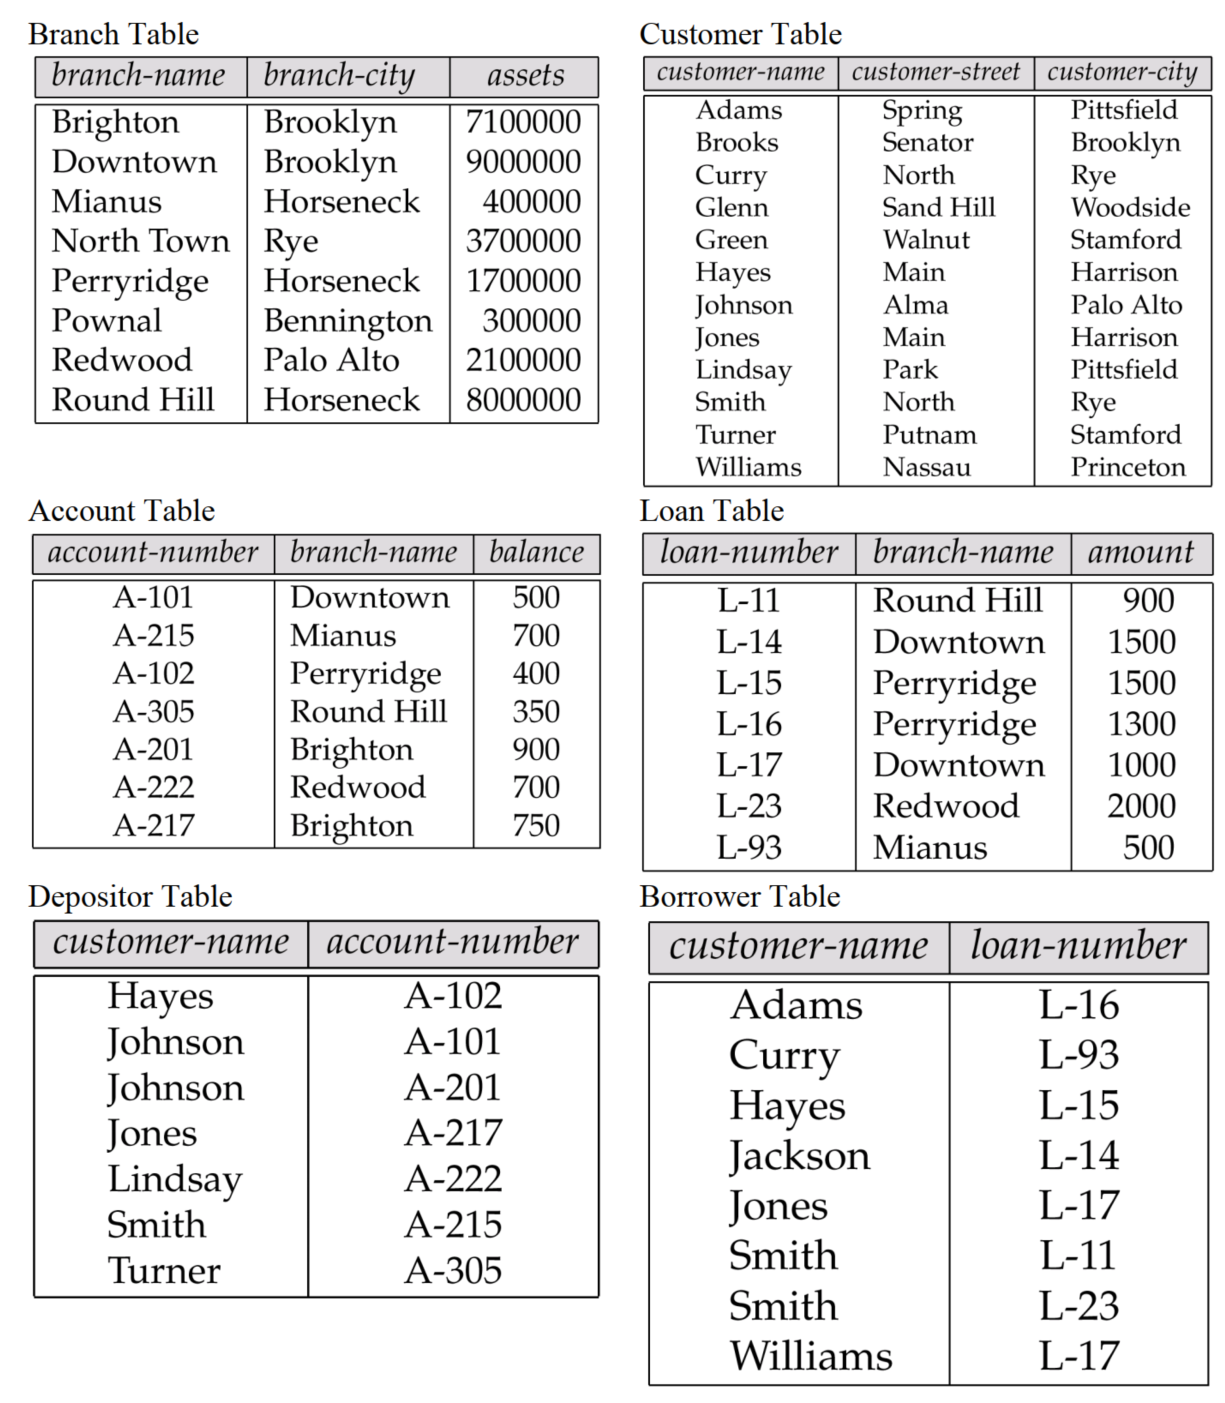

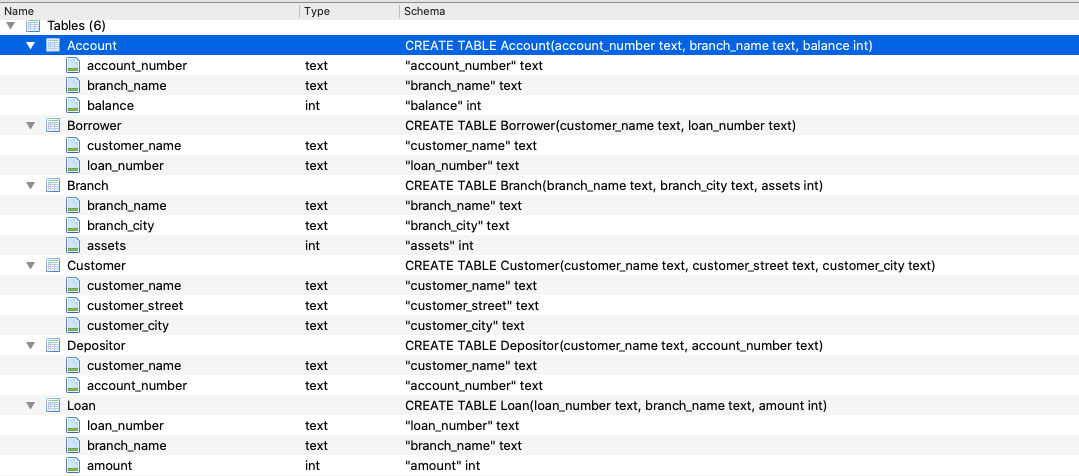

**Bank Question #1:** Find all loans over $1200.

In [24]:
cursorB.execute('''SELECT * FROM Loan WHERE amount > 1200''')
query = cursorB.fetchall()
pd.DataFrame(query,columns=['loan','branch','amount'])

loan      branch  amount
0  L14    Downtown    1500
1  L15  Perryridge    1500
2  L16  Perryridge    1300
3  L23     Redwood    2000

**Bank Question #2:** Find the loan number for each loan of an amount greater than $1200.

In [25]:
cursorB.execute('''SELECT loan_number FROM LOAN WHERE amount > 1200  ''')
query = cursorB.fetchall()
pd.DataFrame(query,columns=['loan'])

loan
0  L14
1  L15
2  L16
3  L23

**Bank Question #3:** Find the names of all customers who have a loan, an account, or both from the bank.

In [26]:
cursorB.execute('''SELECT c.customer_name FROM Customer c JOIN Loan''')
query = cursorB.fetchall()
pd.DataFrame(query,columns=['cname'])

cname
0      Adams
1      Adams
2      Adams
3      Adams
4      Adams
..       ...
79  Williams
80  Williams
81  Williams
82  Williams
83  Williams

[84 rows x 1 columns]

**Bank Question #4:** Find the names of all customers who have a loan and an account at the bank.

In [ ]:
cursorB.execute('''
SELECT customer_name Depositor
UNION
SELECT customer_name Borrower''')
query = cursorB.fetchall()
pd.DataFrame(query,columns=['cname'])

**Bank Question #5:** Find the names of all customers who have a loan at the Perryridge branch.

In [27]:
cursorB.execute('''SELECT customer_name 
FROM Borrower 
JOIN Loan ON Borrower.loan_number = Loan.loan_number 
WHERE Loan.branch_name = 'Perryridge'''')
query = cursorB.fetchall()
pd.DataFrame(query,columns=['cname'])

SyntaxError: EOL while scanning string literal (<ipython-input-27-73c0d9925cd8>, line 4)

**Bank Question #6:** Find the names of all customers who have a loan at the Perryridge branch, but no account at
any branch of the bank.

In [ ]:
cursorB.execute('''
(SELECT customer_name FROM Borrower JOIN Loan ON Borrower.loan_number = Loan.loan_number WHERE Loan.branch_name = 'Perryridge')
EXCEPT
(SELECT customer_name FROM Depositor)
''')
query = cursorB.fetchall()
pd.DataFrame(query,columns=['cname'])

**Bank Question #7:** Find the names of all customers who have an account at the Downtown and Mianus branches.

In [28]:
cursorB.execute('''
SELECT customer_name from Depositor
JOIN Account ON Depositor.account_name = Account.account_numer
WHERE Account.branch_name = 'Downtown'
INTERSECT
SELECT customer_name from Depositor
JOIN Account ON Depositor.account_name = Account.account_numer
WHERE Account.branch_name = 'Mianus'
''')
query = cursorB.fetchall()
pd.DataFrame(query,columns=['cname'])

OperationalError: no such column: Depositor.account_name

**Bank Question #8:** Find the total amount each branch has in account, ordered by the total amount in descending order.

In [29]:
cursorB.execute('''
SELECT Account.branch_name, SUM(balance)
FROM Account
GROUP BY Account.branch_name
ORDER BY balance DESC
''')
query = cursorB.fetchall()
pd.DataFrame(query,columns=['branch', 'amount'])

branch  amount
0    Brighton    1650
1     Redwood     700
2      Mianus     700
3    Downtown     500
4  Perryridge     400
5  Round Hill     350

**Bank Question #9:** Find the average loan amount of each customer.

In [30]:
cursorB.execute(''' 
SELECT AVG(Loan.amount), Borrower.customer_name
FROM Loan
JOIN Borrower ON Loan.loan_number = Borrower.loan_number
GROUP BY (Borrower.customer_name)
''')
query = cursorB.fetchall()
pd.DataFrame(query,columns=['cname', 'avg_loan'])

cname  avg_loan
0  1300.0     Adams
1   500.0     Curry
2  1500.0     Hayes
3  1500.0   Jackson
4  1000.0     Jones
5  1450.0     Smith
6  1000.0  Williams

**Bank Question #10:** Find the names of all customers who have an account at every branch located in Brooklyn.

In [32]:
cursorB.execute('''
SELECT DISTINCT Customer.customer_name
FROM Customer
JOIN Depositor ON Customer.customer_name = Depositor.customer_name
JOIN Account ON Depositor.account_number = Account.account_number
JOIN Branch ON Account.branch_name = Branch.branch_name
WHERE Branch.branch_city = 'Brooklyn'
''')
query = cursorB.fetchall()
pd.DataFrame(query,columns=['cname'])

cname
0  Johnson
1    Jones